#### Multiple Linear Regression

##### Bike Sharing company-Boom Bikes dataset

##### Problem Statement:
Boom Bikes want to understand the factors on which the demand for these shared bikes depends(how exactly the demands vary with different features). 
Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 
##### The company wants to know:
##### 1.Which variables are significant in predicting the demand for shared bikes.
##### 2.How well those variables describe the bike demands


In [1248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1249]:
import warnings
warnings.filterwarnings('ignore')

#### Step1:Reading and Understanding the data

In [1250]:
bike=pd.read_csv("day.csv")

In [1251]:
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

##### Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [1252]:
bike.shape

(730, 16)

In [1253]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [1254]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### There are no null values

In [1255]:
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

##### We need to replace the nominal Categorical Columns-season,yr,mnth,weekday,workingday,weathersit with the the respective string values

In [1256]:
bike['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [1257]:
season_labels={1:'spring',2:'summer',3:'fall',4:'winter'}

In [1258]:
bike['yr'].value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [1259]:
year_labels={0:'2018',1:'2019'}

In [1260]:
month_labels={1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}

In [1261]:
bike['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [1262]:
holiday_labels={1:'yes',0:'no'}

In [1263]:
bike['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [1264]:
bike['workingday'].value_counts()

workingday
1    504
0    226
Name: count, dtype: int64

In [1265]:
workingday_labels={1:'yes',0:'no'}

In [1266]:
bike['weekday'].value_counts()

weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

In [1267]:
weekday_labels={0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}

In [1268]:
bike['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [1269]:
weathersit_labels={1:'clear',2:'cloudy',3:'light snow/rain',4:'heavy snow/rain'}

In [1270]:
bike['season']=bike['season'].replace(season_labels)

In [1271]:
bike['yr']=bike['yr'].replace(year_labels)

In [1272]:
bike['mnth']=bike['mnth'].replace(month_labels)

In [1273]:
bike['holiday']=bike['holiday'].replace(holiday_labels)

In [1274]:
bike['workingday']=bike['workingday'].replace(workingday_labels)

In [1275]:
bike['weekday']=bike['weekday'].replace(weekday_labels)

In [1276]:
bike['weathersit']=bike['weathersit'].replace(weathersit_labels)

In [1277]:
bike['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [1278]:
bike['yr'].value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

In [1279]:
bike['mnth'].value_counts()

mnth
jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: count, dtype: int64

In [1280]:
bike['weathersit'].value_counts()

weathersit
clear              463
cloudy             246
light snow/rain     21
Name: count, dtype: int64

In [1281]:
bike.head()

instant      dteday  season    yr mnth holiday weekday workingday  \
0        1  01-01-2018  spring  2018  jan      no     mon        yes   
1        2  02-01-2018  spring  2018  jan      no     tue        yes   
2        3  03-01-2018  spring  2018  jan      no     wed        yes   
3        4  04-01-2018  spring  2018  jan      no     thu        yes   
4        5  05-01-2018  spring  2018  jan      no     fri        yes   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0     cloudy  14.110847  18.18125  80.5833  10.749882     331         654   
1     cloudy  14.902598  17.68695  69.6087  16.652113     131         670   
2      clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

#### Step2:Data Visualization

##### Visualising Numeric Variables

In [1282]:
bike.dtypes

instant         int64
dteday         object
season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

##### convert dteday to date type format

In [1283]:
bike['dteday'] = pd.to_datetime(bike['dteday'],format='%d-%m-%Y')

In [1284]:
bike.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
holiday               object
weekday               object
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [1285]:
cat_cols=['season','yr','mnth','holiday','workingday','weekday','weathersit']
num_cols=['dteday','temp','atemp','hum','windspeed','casual','registered','cnt']
index_col=['instant']

##### PLot histograms/distplot of numerical columns to understand their distribution

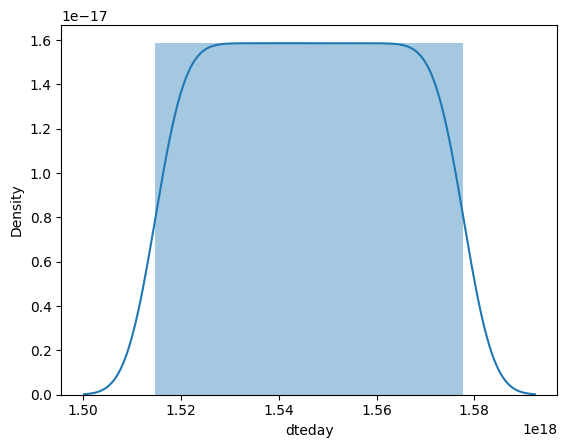

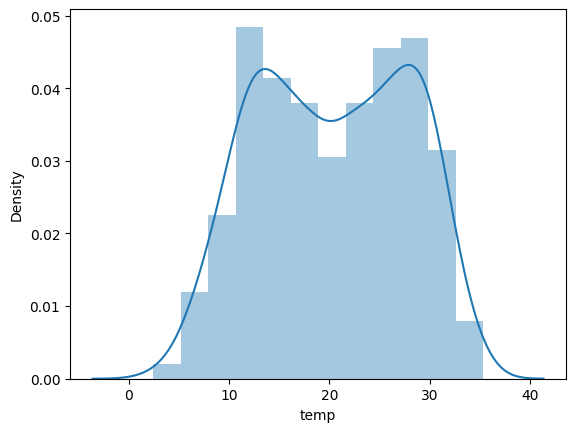

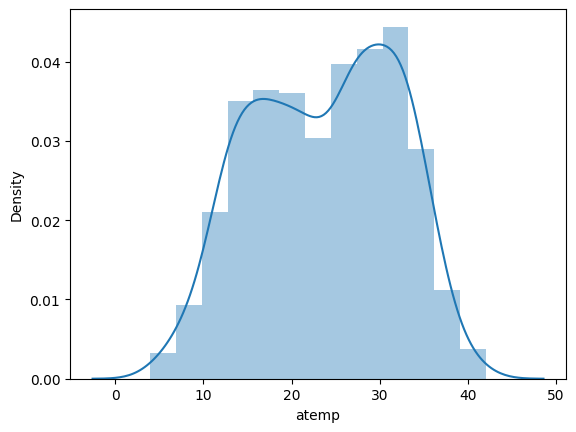

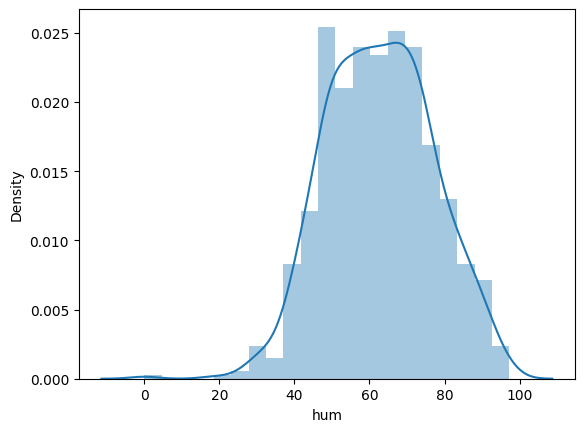

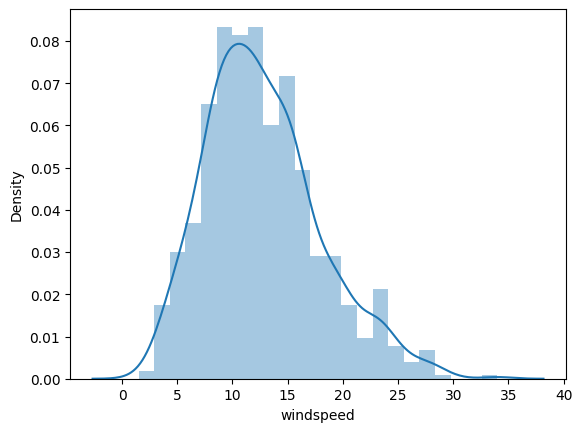

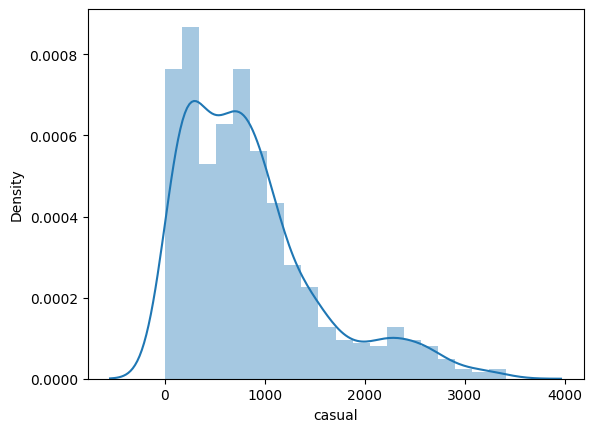

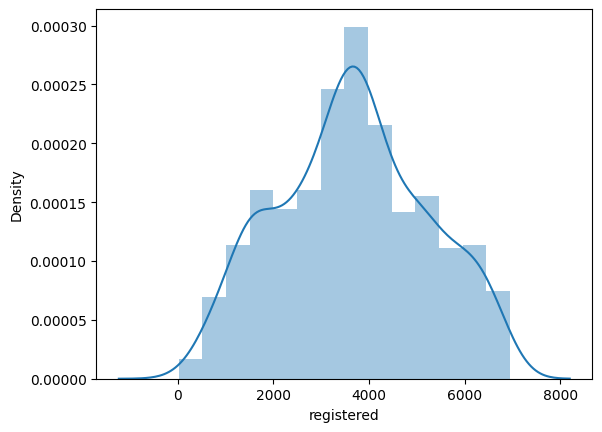

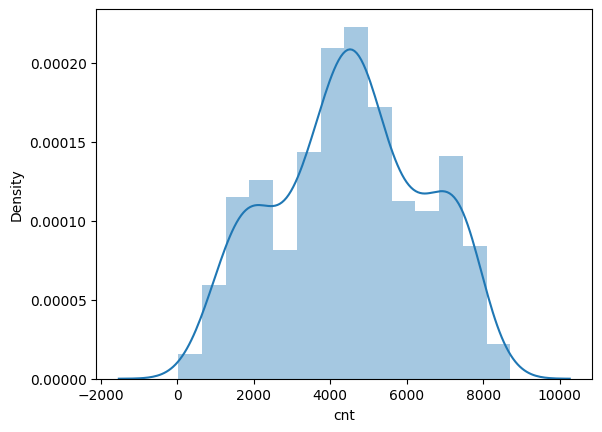

In [1286]:
for col in num_cols:
    sns.distplot(bike[col])
    plt.show()

##### Observation: All the numerical data looks almost normally distributed

##### Box Plots: Identify outliers and understand the spread and central tendency of the categorical columns.


<function matplotlib.pyplot.show(close=None, block=None)>

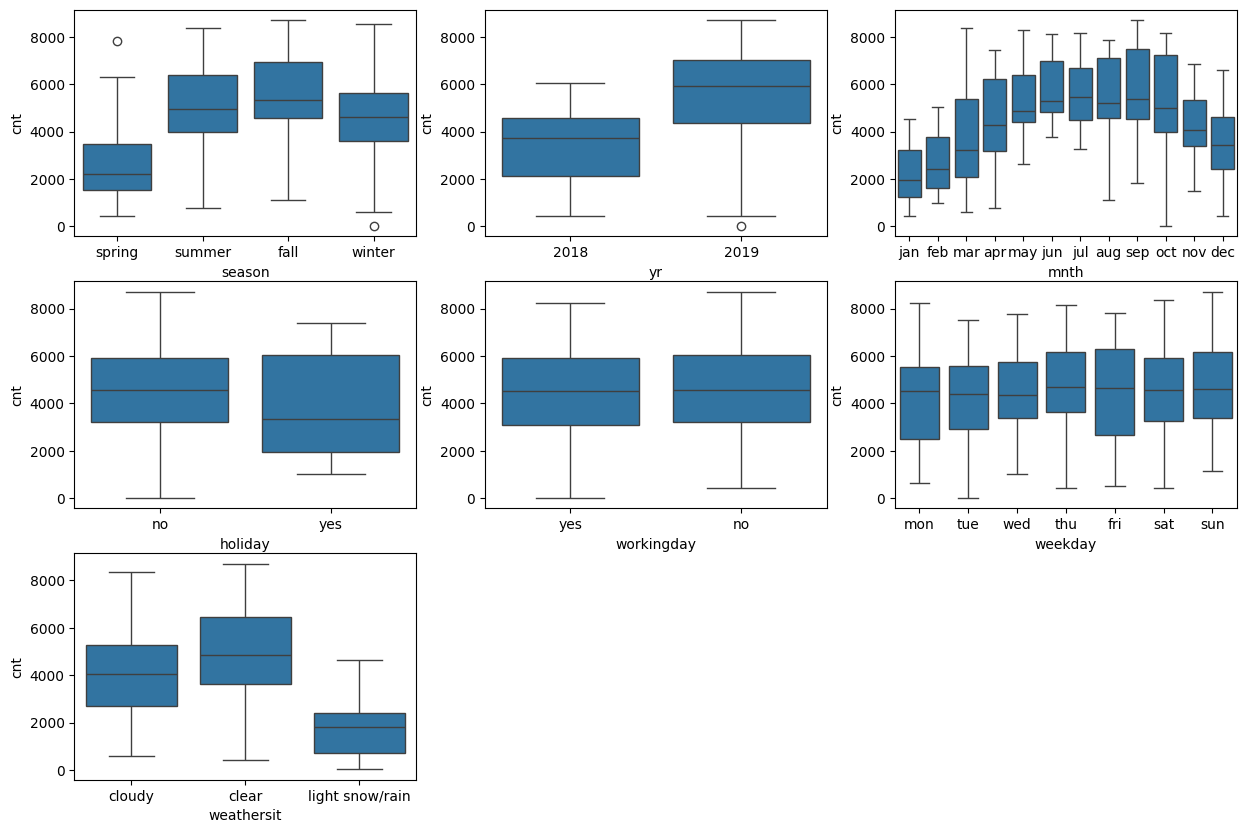

In [1287]:
plt.figure(figsize=(15, 10))
i=1
for col in cat_cols:
    plt.subplot(3,3,i)
    sns.boxplot(data=bike,x=col,y='cnt')
    i=i+1
plt.show

##### Observations:
##### 1.rental count is higher in fall followed by summer. lowest in winter
##### 2.The rental count has almost increased by 2000 from 2018 to 2019 which implies the demand is increasing year by year
##### 3.with respect to months, january and febrauary has lowest and september and october has the highest
##### 4.with respect to weekdays, there are no significant difference except that the spread is more on friday 
##### 5.rentals are higher on clear days and lower on snow/rain days which are expected

##### Outliers:
##### Therer are three outliers in season(spring,winter) and year(2019) versus count barplot and we shall remove the outliers

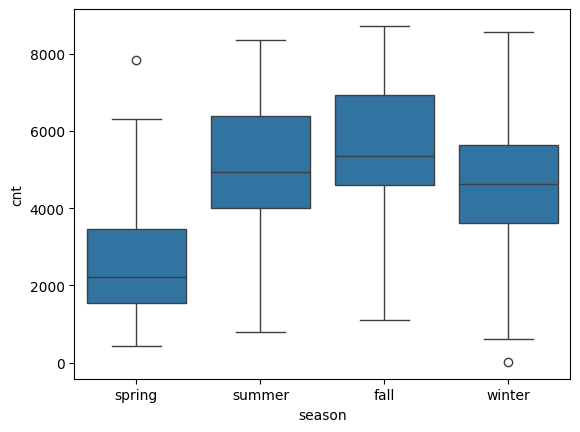

In [1288]:
sns.boxplot(data=bike,x='season',y='cnt')
plt.show()

In [1289]:

bike = bike.drop(bike[(bike['season'] == 'spring') & (bike['cnt'] > 6500)].index)
bike = bike.drop(bike[(bike['season'] == 'winter') & (bike['cnt'] < 100)].index)
bike = bike.drop(bike[(bike['yr'] == '2019') & (bike['cnt'] < 100)].index)




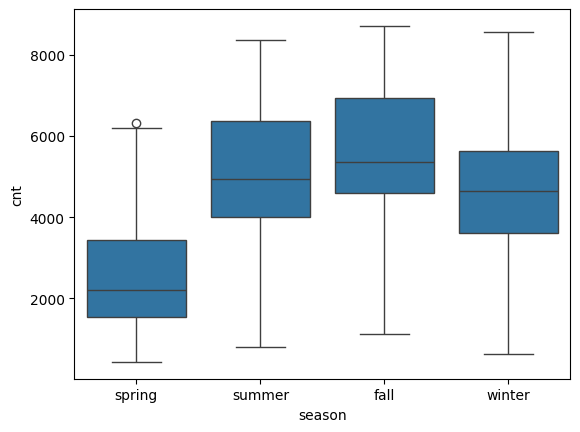

In [1290]:
sns.boxplot(data=bike,x='season',y='cnt')
plt.show()

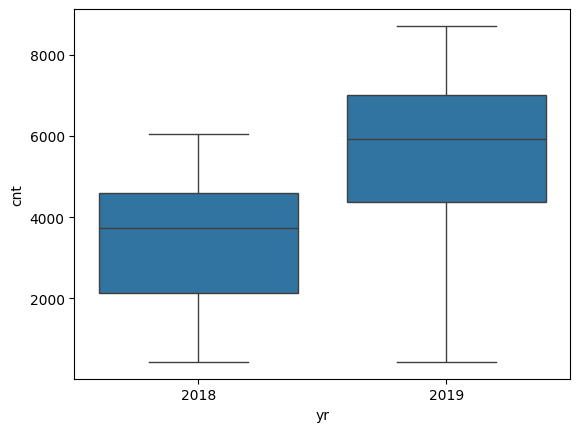

In [1291]:
sns.boxplot(data=bike,x='yr',y='cnt')
plt.show()

##### Pairwise Scatter Plots: Visualize relationships between pairs of variables.

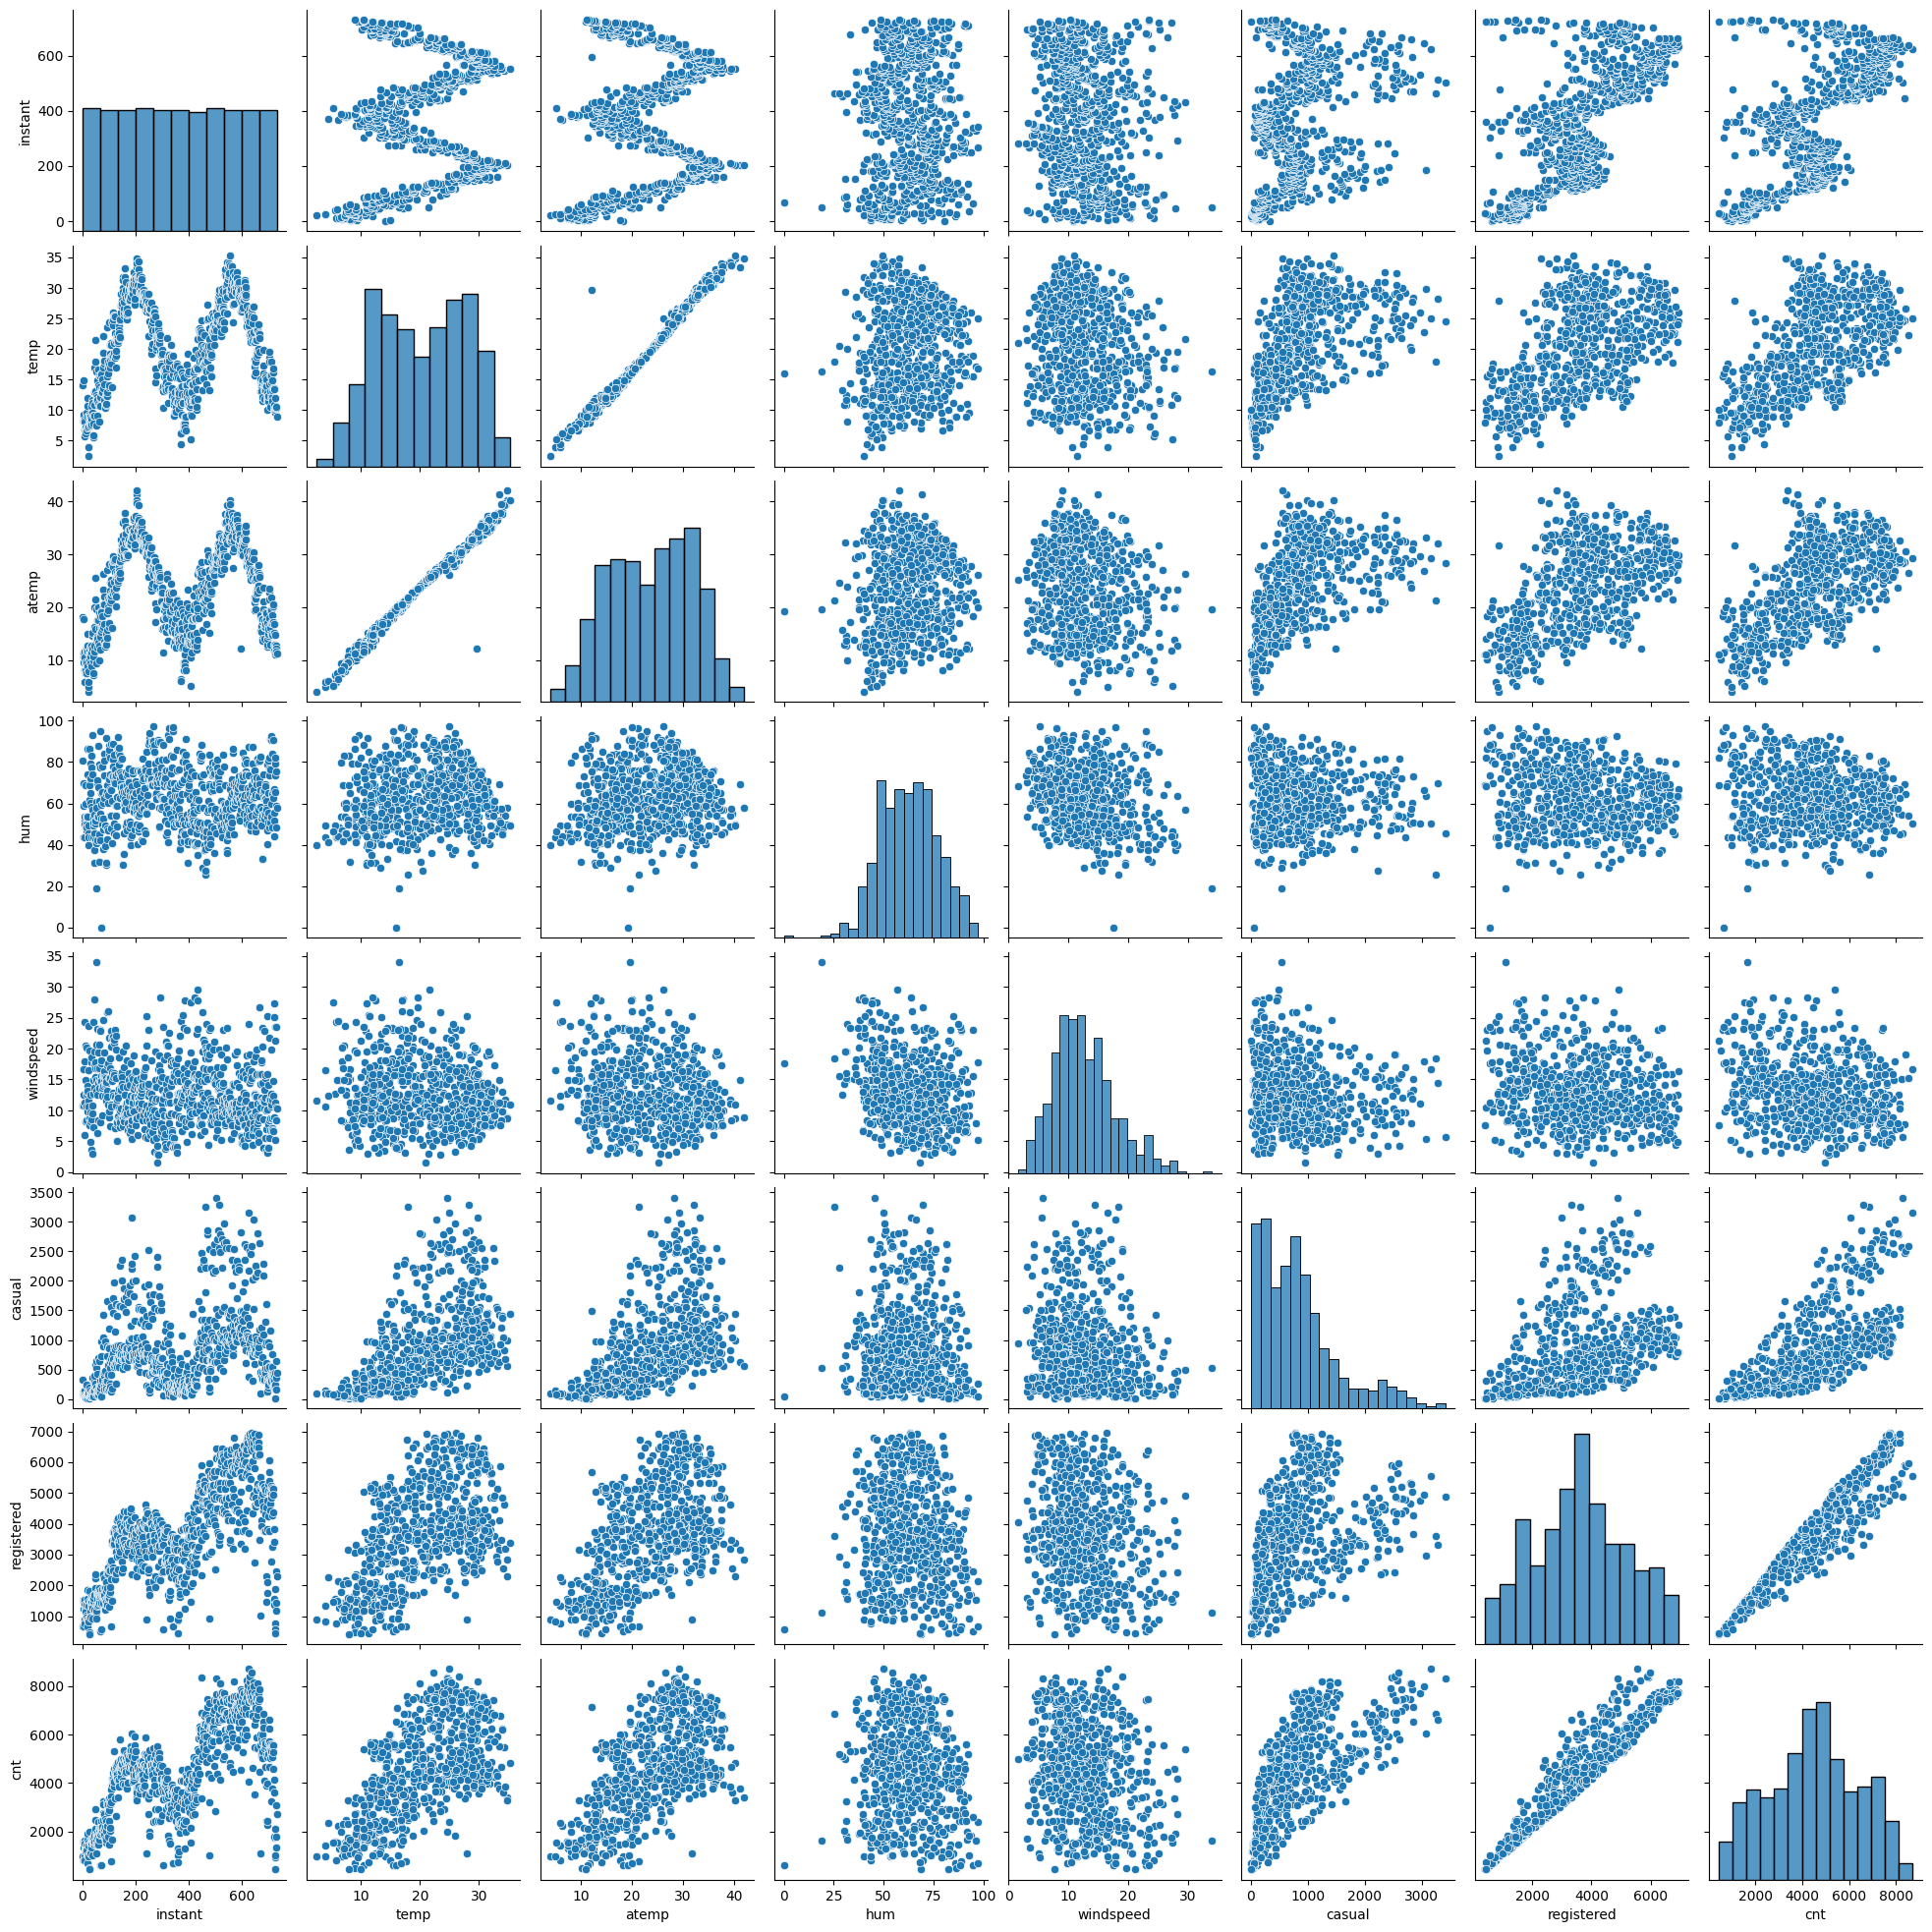

In [1292]:
sns.pairplot(bike)
plt.show()

#### Observations:
##### 1. There are few outliers 
##### 2.temp,atemp,casual and registered have almost linear relationship with cnt(rent total)

##### Treating Outliers

In [1293]:
bike[(bike['temp']>20) & (bike['atemp']<20)]

instant     dteday season    yr mnth holiday weekday workingday  \
593      594 2019-08-17   fall  2019  aug      no     sat         no   

    weathersit       temp  atemp      hum  windspeed  casual  registered   cnt  
593      clear  29.656653  12.12  57.0833  15.500718    1483        5665  7148

In [1294]:
bike[(bike['hum']<20)]

instant     dteday  season    yr mnth holiday weekday workingday  \
49       50 2018-02-19  spring  2018  feb      no     mon        yes   
68       69 2018-03-10  spring  2018  mar      no     sat         no   

         weathersit       temp    atemp      hum  windspeed  casual  \
49            clear  16.365847  19.5702  18.7917  34.000021     532   
68  light snow/rain  15.952731  19.2834   0.0000  17.545759      46   

    registered   cnt  
49        1103  1635  
68         577   623

In [1295]:
bike[(bike['windspeed']>30)]

instant     dteday  season    yr mnth holiday weekday workingday  \
49       50 2018-02-19  spring  2018  feb      no     mon        yes   

   weathersit       temp    atemp      hum  windspeed  casual  registered  \
49      clear  16.365847  19.5702  18.7917  34.000021     532        1103   

     cnt  
49  1635

In [1296]:
bike = bike.drop(bike[(bike['windspeed']>30)].index)
bike = bike.drop(bike[(bike['hum']<20)].index)
bike = bike.drop(bike[(bike['temp']>20) & (bike['atemp']<20)].index)


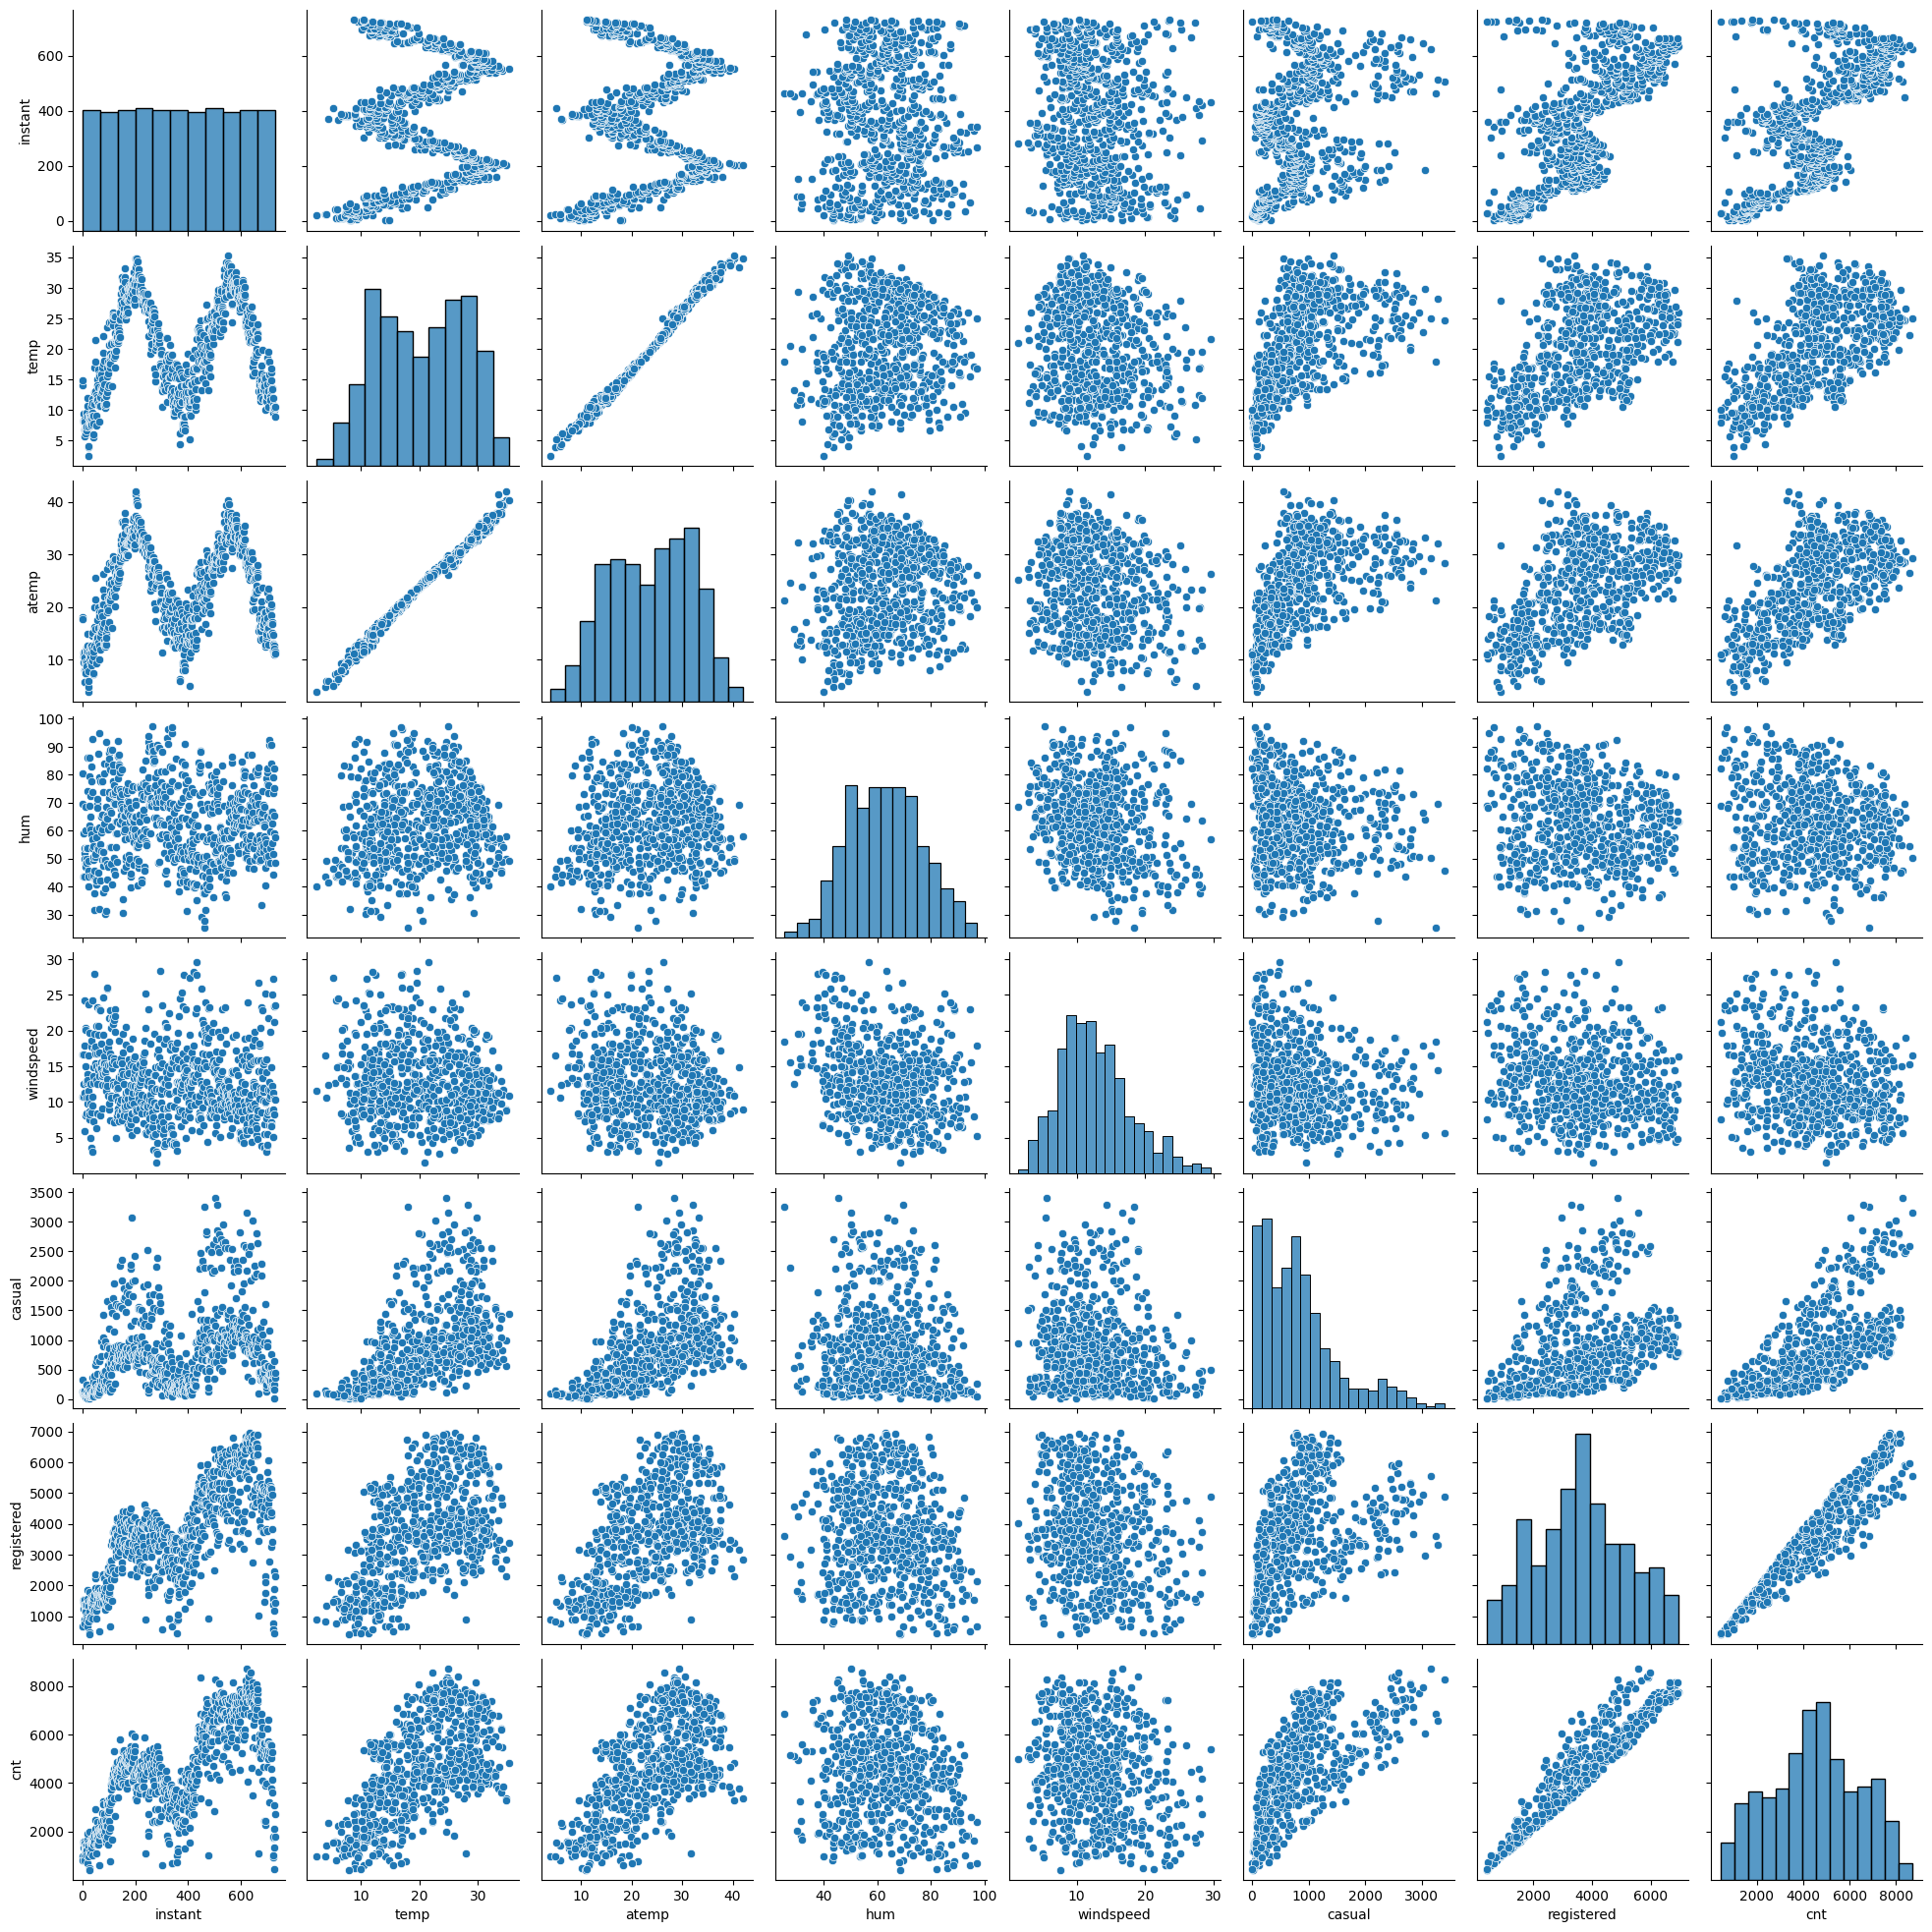

In [1297]:
sns.pairplot(bike)
plt.show()

##### Correlation Matrix: heatmap to visualize correlations between variables.


In [1298]:
cor = bike[num_cols].corr()
cor

dteday      temp     atemp       hum  windspeed    casual  \
dteday      1.000000  0.148233  0.154205 -0.002147  -0.109369  0.276120   
temp        0.148233  1.000000  0.996584  0.127226  -0.157162  0.545480   
atemp       0.154205  0.996584  1.000000  0.138987  -0.181661  0.549521   
hum        -0.002147  0.127226  0.138987  1.000000  -0.238546 -0.087792   
windspeed  -0.109369 -0.157162 -0.181661 -0.238546   1.000000 -0.160491   
casual      0.276120  0.545480  0.549521 -0.087792  -0.160491  1.000000   
registered  0.665625  0.539505  0.549038 -0.106021  -0.204570  0.389182   
cnt         0.635113  0.628931  0.638058 -0.116709  -0.222032  0.668927   

            registered       cnt  
dteday        0.665625  0.635113  
temp          0.539505  0.628931  
atemp         0.549038  0.638058  
hum          -0.106021 -0.116709  
windspeed    -0.204570 -0.222032  
casual        0.389182  0.668927  
registered    1.000000  0.945059  
cnt           0.945059  1.000000

<Axes: >

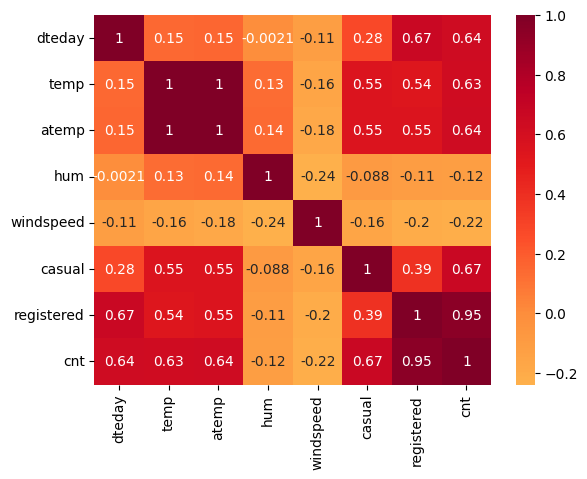

In [1299]:

sns.heatmap(bike[num_cols].corr(),cmap='YlOrRd',center=0,annot=True)


#### Observations:
##### 1.cnt is positively correlated with registered followed by dteday,temp,atemp
##### 2.cnt is negatively correlated with windspeed meaning rental will be less on windy days
##### 3.temp is highly correlated with atemp(these both are independent variables which leads to multicollinearity)



#### Step3:Data Preparation

##### Dropping the unwanted variables

##### 1.instant is just serial number and we can drop it
##### 2.dteday is contained in mnth,yr which is required for analysis and so we can drop dteday
##### 3.atemp is feel like temperature and we have temp column for analysis.temp and atemp have high correlation. so we can drop atemp
##### 4.cnt=casual+registered and so the information is redundant and we can drop casual,registered


In [1300]:
bike.drop(labels=['instant','dteday','atemp','casual','registered'],axis=1,inplace=True)

In [1301]:
bike.head()

season    yr mnth holiday weekday workingday weathersit       temp  \
0  spring  2018  jan      no     mon        yes     cloudy  14.110847   
1  spring  2018  jan      no     tue        yes     cloudy  14.902598   
2  spring  2018  jan      no     wed        yes      clear   8.050924   
3  spring  2018  jan      no     thu        yes      clear   8.200000   
4  spring  2018  jan      no     fri        yes      clear   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

##### Dummy Variables:

##### There are some categorical collumns. - But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [1302]:
cat_cols

['season', 'yr', 'mnth', 'holiday', 'workingday', 'weekday', 'weathersit']

In [1303]:
bike_dummies = pd.get_dummies(bike[cat_cols], drop_first=True)
bike_dummies=bike_dummies.astype(int)
bike_dummies

season_spring  season_summer  season_winter  yr_2019  mnth_aug  mnth_dec  \
0                1              0              0        0         0         0   
1                1              0              0        0         0         0   
2                1              0              0        0         0         0   
3                1              0              0        0         0         0   
4                1              0              0        0         0         0   
..             ...            ...            ...      ...       ...       ...   
725              1              0              0        1         0         1   
726              1              0              0        1         0         1   
727              1              0              0        1         0         1   
728              1              0              0        1         0         1   
729              1              0              0        1         0         1   

     mnth_feb  mnth_jan  mnth_jul  mnth_jun  ...  holiday_yes  workingday_yes  \
0           0         1         0         0  ...            0               1   
1           0         1         0         0  ...            0               1   
2           0         1         0         0  ...            0               1   
3           0         1         0         0  ...            0               1   
4           0         1         0         0  ...            0               1   
..        ...       ...       ...       ...  ...          ...             ...   
725         0         0         0         0  ...            0               1   
726         0         0         0         0  ...            0               0   
727         0         0         0         0  ...            0               0   
728         0         0         0         0  ...            0               1   
729         0         0         0         0  ...            0               1   

     weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
0              1            0            0            0            0   
1              0            0            0            0            1   
2              0            0            0            0            0   
3              0            0            0            1            0   
4              0            0            0            0            0   
..           ...          ...          ...          ...          ...   
725            0            0            0            0            0   
726            0            1            0            0            0   
727            0            0            1            0            0   
728            1            0            0            0            0   
729            0            0            0            0            1   

     weekday_wed  weathersit_cloudy  weathersit_light snow/rain  
0              0                  1                           0  
1              0                  1                           0  
2              1                  0                           0  
3              0                  0                           0  
4              0                  0                           0  
..           ...                ...                         ...  
725            0                  1                           0  
726            0                  1                           0  
727            0                  1                           0  
728            0                  0                           0  
729            0                  1                           0  

[725 rows x 25 columns]

##### concatenating the dummy variables to the bike data frame and removing the categorical columns

In [1304]:
bike=pd.concat([bike,bike_dummies],axis=1)
bike.head()

season    yr mnth holiday weekday workingday weathersit       temp  \
0  spring  2018  jan      no     mon        yes     cloudy  14.110847   
1  spring  2018  jan      no     tue        yes     cloudy  14.902598   
2  spring  2018  jan      no     wed        yes      clear   8.050924   
3  spring  2018  jan      no     thu        yes      clear   8.200000   
4  spring  2018  jan      no     fri        yes      clear   9.305237   

       hum  windspeed  ...  holiday_yes  workingday_yes  weekday_mon  \
0  80.5833  10.749882  ...            0               1            1   
1  69.6087  16.652113  ...            0               1            0   
2  43.7273  16.636703  ...            0               1            0   
3  59.0435  10.739832  ...            0               1            0   
4  43.6957  12.522300  ...            0               1            0   

   weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  \
0            0            0            0            0            0   
1            0            0            0            1            0   
2            0            0            0            0            1   
3            0            0            1            0            0   
4            0            0            0            0            0   

   weathersit_cloudy  weathersit_light snow/rain  
0                  1                           0  
1                  1                           0  
2                  0                           0  
3                  0                           0  
4                  0                           0  

[5 rows x 36 columns]

In [1305]:
bike.drop(labels=cat_cols,axis=1,inplace=True)
bike.head()

temp      hum  windspeed   cnt  season_spring  season_summer  \
0  14.110847  80.5833  10.749882   985              1              0   
1  14.902598  69.6087  16.652113   801              1              0   
2   8.050924  43.7273  16.636703  1349              1              0   
3   8.200000  59.0435  10.739832  1562              1              0   
4   9.305237  43.6957  12.522300  1600              1              0   

   season_winter  yr_2019  mnth_aug  mnth_dec  ...  holiday_yes  \
0              0        0         0         0  ...            0   
1              0        0         0         0  ...            0   
2              0        0         0         0  ...            0   
3              0        0         0         0  ...            0   
4              0        0         0         0  ...            0   

   workingday_yes  weekday_mon  weekday_sat  weekday_sun  weekday_thu  \
0               1            1            0            0            0   
1               1            0            0            0            0   
2               1            0            0            0            0   
3               1            0            0            0            1   
4               1            0            0            0            0   

   weekday_tue  weekday_wed  weathersit_cloudy  weathersit_light snow/rain  
0            0            0                  1                           0  
1            1            0                  1                           0  
2            0            1                  0                           0  
3            0            0                  0                           0  
4            0            0                  0                           0  

[5 rows x 29 columns]

In [1306]:
bike.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sep', 'holiday_yes', 'workingday_yes', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_cloudy', 'weathersit_light snow/rain'],
      dtype='object')

##### splitting the data set into test and train data sets

In [1307]:
from sklearn.model_selection import train_test_split

In [1308]:
bike.shape

(725, 29)

In [1309]:
btrain,btest=train_test_split(bike,train_size=0.7,test_size=0.3,random_state=100)

In [1310]:
btrain.shape

(507, 29)

In [1311]:
btest.shape

(218, 29)

##### scaling  using MinMax scaler

In [1312]:
from sklearn.preprocessing import MinMaxScaler

In [1313]:
scaler=MinMaxScaler()

In [1314]:
num_vars=['temp','hum','windspeed','cnt']

In [1315]:
btrain_scaled=btrain

In [1316]:
btrain_scaled[num_vars]=scaler.fit_transform(btrain[num_vars])

In [1317]:
btrain_scaled.head()

temp       hum  windspeed       cnt  season_spring  season_summer  \
641  0.772053  0.627669   0.188454  0.832669              0              0   
728  0.253798  0.270255   0.772556  0.164795              1              0   
477  0.338741  0.692936   0.654192  0.335989              0              1   
113  0.674209  0.758823   0.375373  0.453942              0              1   
685  0.343041  0.362873   0.344200  0.627550              0              0   

     season_winter  yr_2019  mnth_aug  mnth_dec  ...  holiday_yes  \
641              1        1         0         0  ...            0   
728              0        1         0         1  ...            0   
477              0        1         0         0  ...            0   
113              0        0         0         0  ...            0   
685              1        1         0         0  ...            0   

     workingday_yes  weekday_mon  weekday_sat  weekday_sun  weekday_thu  \
641               1            0            0            0            0   
728               1            1            0            0            0   
477               1            0            0            0            0   
113               1            0            0            0            0   
685               0            0            0            1            0   

     weekday_tue  weekday_wed  weathersit_cloudy  weathersit_light snow/rain  
641            0            0                  1                           0  
728            0            0                  0                           0  
477            1            0                  1                           0  
113            1            0                  1                           0  
685            0            0                  0                           0  

[5 rows x 29 columns]

In [1318]:
btrain_scaled.describe()

temp         hum   windspeed         cnt  season_spring  \
count  507.000000  507.000000  507.000000  507.000000     507.000000   
mean     0.557025    0.490284    0.373803    0.494001       0.246548   
std      0.234937    0.210656    0.191895    0.236355       0.431427   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      0.346805    0.324334    0.232054    0.320174       0.000000   
50%      0.549483    0.482838    0.353530    0.492575       0.000000   
75%      0.764527    0.645695    0.482055    0.671013       0.000000   
max      1.000000    1.000000    1.000000    1.000000       1.000000   

       season_summer  season_winter     yr_2019    mnth_aug    mnth_dec  ...  \
count     507.000000     507.000000  507.000000  507.000000  507.000000  ...   
mean        0.242604       0.252465    0.504931    0.088757    0.084813  ...   
std         0.429081       0.434856    0.500469    0.284674    0.278878  ...   
min         0.000000       0.000000    0.000000    0.000000    0.000000  ...   
25%         0.000000       0.000000    0.000000    0.000000    0.000000  ...   
50%         0.000000       0.000000    1.000000    0.000000    0.000000  ...   
75%         0.000000       1.000000    1.000000    0.000000    0.000000  ...   
max         1.000000       1.000000    1.000000    1.000000    1.000000  ...   

       holiday_yes  workingday_yes  weekday_mon  weekday_sat  weekday_sun  \
count   507.000000      507.000000   507.000000   507.000000   507.000000   
mean      0.029586        0.680473     0.145957     0.140039     0.153846   
std       0.169609        0.466754     0.353411     0.347371     0.361158   
min       0.000000        0.000000     0.000000     0.000000     0.000000   
25%       0.000000        0.000000     0.000000     0.000000     0.000000   
50%       0.000000        1.000000     0.000000     0.000000     0.000000   
75%       0.000000        1.000000     0.000000     0.000000     0.000000   
max       1.000000        1.000000     1.000000     1.000000     1.000000   

       weekday_thu  weekday_tue  weekday_wed  weathersit_cloudy  \
count   507.000000   507.000000   507.000000         507.000000   
mean      0.132150     0.136095     0.147929           0.355030   
std       0.338988     0.343228     0.355380           0.478995   
min       0.000000     0.000000     0.000000           0.000000   
25%       0.000000     0.000000     0.000000           0.000000   
50%       0.000000     0.000000     0.000000           0.000000   
75%       0.000000     0.000000     0.000000           1.000000   
max       1.000000     1.000000     1.000000           1.000000   

       weathersit_light snow/rain  
count                  507.000000  
mean                     0.021696  
std                      0.145834  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      0.000000  
max                      1.000000  

[8 rows x 29 columns]

##### Dividing into X and y sets for model Building

In [1319]:
y_train=btrain_scaled.pop('cnt')
X_train=btrain_scaled

In [1320]:
y_train.head()

641    0.832669
728    0.164795
477    0.335989
113    0.453942
685    0.627550
Name: cnt, dtype: float64

In [1321]:
X_train.head()

temp       hum  windspeed  season_spring  season_summer  \
641  0.772053  0.627669   0.188454              0              0   
728  0.253798  0.270255   0.772556              1              0   
477  0.338741  0.692936   0.654192              0              1   
113  0.674209  0.758823   0.375373              0              1   
685  0.343041  0.362873   0.344200              0              0   

     season_winter  yr_2019  mnth_aug  mnth_dec  mnth_feb  ...  holiday_yes  \
641              1        1         0         0         0  ...            0   
728              0        1         0         1         0  ...            0   
477              0        1         0         0         0  ...            0   
113              0        0         0         0         0  ...            0   
685              1        1         0         0         0  ...            0   

     workingday_yes  weekday_mon  weekday_sat  weekday_sun  weekday_thu  \
641               1            0            0            0            0   
728               1            1            0            0            0   
477               1            0            0            0            0   
113               1            0            0            0            0   
685               0            0            0            1            0   

     weekday_tue  weekday_wed  weathersit_cloudy  weathersit_light snow/rain  
641            0            0                  1                           0  
728            0            0                  0                           0  
477            1            0                  1                           0  
113            1            0                  1                           0  
685            0            0                  0                           0  

[5 rows x 28 columns]

#### Step5:Building a linear Model

##### RFE(Recursive feature Elimination)

In [1322]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

##### Selecting 15 features using RFE method

In [1323]:
lm = LinearRegression()

In [1324]:
lm.fit(X_train,y_train)

LinearRegression()

In [1325]:
rfe = RFE(estimator=lm, n_features_to_select=20) 

In [1326]:
rfe=rfe.fit(X_train,y_train)

In [1327]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_aug', False, 6),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 8),
 ('mnth_jan', False, 4),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 9),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 2),
 ('mnth_oct', True, 1),
 ('mnth_sep', True, 1),
 ('holiday_yes', True, 1),
 ('workingday_yes', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 7),
 ('weekday_tue', True, 1),
 ('weekday_wed', False, 5),
 ('weathersit_cloudy', True, 1),
 ('weathersit_light snow/rain', True, 1)]

In [1328]:
rfe_ranking=pd.DataFrame({'rank':rfe.ranking_,'support':rfe.support_,'features':X_train.columns}).sort_values(by='rank',ascending=True)

In [1329]:
rfe_ranking

rank  support                    features
0      1     True                        temp
24     1     True                 weekday_tue
22     1     True                 weekday_sun
21     1     True                 weekday_sat
20     1     True                 weekday_mon
19     1     True              workingday_yes
18     1     True                 holiday_yes
17     1     True                    mnth_sep
16     1     True                    mnth_oct
14     1     True                    mnth_may
26     1     True           weathersit_cloudy
13     1     True                    mnth_mar
6      1     True                     yr_2019
5      1     True               season_winter
4      1     True               season_summer
3      1     True               season_spring
2      1     True                   windspeed
1      1     True                         hum
11     1     True                    mnth_jul
27     1     True  weathersit_light snow/rain
15     2    False                    mnth_nov
8      3    False                    mnth_dec
10     4    False                    mnth_jan
25     5    False                 weekday_wed
7      6    False                    mnth_aug
23     7    False                 weekday_thu
9      8    False                    mnth_feb
12     9    False                    mnth_jun

In [1330]:
col=X_train.columns
col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sep', 'holiday_yes', 'workingday_yes', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_cloudy', 'weathersit_light snow/rain'],
      dtype='object')

In [1331]:
selected_features=X_train.columns[rfe.support_]
selected_features

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_jul', 'mnth_mar', 'mnth_may',
       'mnth_oct', 'mnth_sep', 'holiday_yes', 'workingday_yes', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_tue', 'weathersit_cloudy',
       'weathersit_light snow/rain'],
      dtype='object')

In [1332]:
unselected_features=X_train.columns[~rfe.support_]
unselected_features

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_nov',
       'weekday_thu', 'weekday_wed'],
      dtype='object')

##### Building model using statsmodel for detailed statistical analysis

##### MODEL1

In [1333]:
X_train_rfe=X_train[selected_features]

##### Adding constant Variable

In [1334]:
import statsmodels.api as sm

In [1335]:
X_train_rfe=sm.add_constant(X_train_rfe)

In [1336]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [1337]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     145.7
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.27e-190
Time:                        13:27:40   Log-Likelihood:                 505.52
No. Observations:                 507   AIC:                            -969.0
Df Residuals:                     486   BIC:                            -880.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### The variables season_summer,mnth_jul,holiday_yes,workingday_yes,weekday_mon,weekday_sun,weekday_sat all have p-values >0.05. 
##### So we will first drop the highest ,holiday_yes and reevaluate the model

##### MODEL2

In [1338]:
selected_features=['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_jul', 'mnth_mar', 'mnth_may',
       'mnth_oct', 'mnth_sep', 'workingday_yes', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_tue', 'weathersit_cloudy',
       'weathersit_light snow/rain']

In [1339]:
X_train_rfe=X_train[selected_features]

In [1340]:
X_train_rfe=sm.add_constant(X_train_rfe)

In [1341]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [1342]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     153.6
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.14e-191
Time:                        13:27:40   Log-Likelihood:                 505.39
No. Observations:                 507   AIC:                            -970.8
Df Residuals:                     487   BIC:                            -886.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### The variables season_summer,mnth_jul,weekday_mon have p-values >0.05.
##### so let's remove the highest p-value variable season_summer and re-evaluatw the model


##### MODEL3:

In [1343]:
selected_features=['temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'yr_2019', 'mnth_jul', 'mnth_mar', 'mnth_may',
       'mnth_oct', 'mnth_sep', 'workingday_yes', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_tue', 'weathersit_cloudy',
       'weathersit_light snow/rain']

In [1344]:
X_train_rfe=X_train[selected_features]

In [1345]:
X_train_rfe=sm.add_constant(X_train_rfe)

In [1346]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [1347]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     161.5
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          2.77e-192
Time:                        13:27:40   Log-Likelihood:                 504.20
No. Observations:                 507   AIC:                            -970.4
Df Residuals:                     488   BIC:                            -890.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### The variable weekday_mon has p-value>0.05. so let us remove that and re-evaluate the model

##### MODEL4:

In [1348]:
selected_features=['temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'yr_2019', 'mnth_jul', 'mnth_mar', 'mnth_may',
       'mnth_oct', 'mnth_sep', 'workingday_yes', 
       'weekday_sat', 'weekday_sun', 'weekday_tue', 'weathersit_cloudy',
       'weathersit_light snow/rain']

In [1349]:
X_train_rfe=X_train[selected_features]

In [1350]:
X_train_rfe=sm.add_constant(X_train_rfe)

In [1351]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [1352]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.38e-192
Time:                        13:27:40   Log-Likelihood:                 502.23
No. Observations:                 507   AIC:                            -968.5
Df Residuals:                     489   BIC:                            -892.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### The variable weekday_tue has p-value >0.05.SO let us remove and re-evaluate the model

##### MODEL5:

In [1353]:
selected_features=['temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'yr_2019', 'mnth_jul', 'mnth_mar', 'mnth_may',
       'mnth_oct', 'mnth_sep', 'workingday_yes', 
       'weekday_sat', 'weekday_sun', 'weathersit_cloudy',
       'weathersit_light snow/rain']

In [1354]:
X_train_rfe=X_train[selected_features]

In [1355]:
X_train_rfe=sm.add_constant(X_train_rfe)

In [1356]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [1357]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          4.02e-193
Time:                        13:27:40   Log-Likelihood:                 500.79
No. Observations:                 507   AIC:                            -967.6
Df Residuals:                     490   BIC:                            -895.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### Dropping the mnth_mar,mnth_may columns as these information will be contained in season_spring 


##### MODEL6:

In [1358]:
selected_features=['temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'yr_2019', 'mnth_jul', 
       'mnth_oct', 'mnth_sep', 'workingday_yes', 
       'weekday_sat', 'weekday_sun', 'weathersit_cloudy',
       'weathersit_light snow/rain']

In [1359]:
X_train_rfe=X_train[selected_features]

In [1360]:
X_train_rfe=sm.add_constant(X_train_rfe)

In [1361]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [1362]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     196.4
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          4.71e-191
Time:                        13:27:40   Log-Likelihood:                 490.34
No. Observations:                 507   AIC:                            -950.7
Df Residuals:                     492   BIC:                            -887.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### Checking VIF

In [1363]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [1364]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                        const  81.52
10              workingday_yes   8.93
12                 weekday_sun   5.99
11                 weekday_sat   5.64
1                         temp   3.33
4                season_spring   2.76
5                season_winter   2.42
2                          hum   2.19
13           weathersit_cloudy   1.77
8                     mnth_oct   1.46
7                     mnth_jul   1.35
14  weathersit_light snow/rain   1.31
3                    windspeed   1.18
9                     mnth_sep   1.13
6                      yr_2019   1.07

##### the columns workingday_yes,weekday_sun,weekday_sat have VIF>5 and low p-values,
##### So lets remove the highest VIF values column-workingday_yes and re-evaluate the model

##### MODEL7:

In [1365]:
selected_features=['temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'yr_2019', 'mnth_jul', 
       'mnth_oct', 'mnth_sep', 
       'weekday_sat', 'weekday_sun', 'weathersit_cloudy',
       'weathersit_light snow/rain']

In [1366]:
X_train_rfe=X_train[selected_features]

In [1367]:
X_train_rfe=sm.add_constant(X_train_rfe)

In [1368]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [1369]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.0
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          6.01e-191
Time:                        13:27:41   Log-Likelihood:                 487.31
No. Observations:                 507   AIC:                            -946.6
Df Residuals:                     493   BIC:                            -887.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### THe varaible weekday_sat has p-value>0.05 ,so lets us eliminate and re-evaluate

##### MODEL8:

In [1370]:
selected_features=['temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'yr_2019', 'mnth_jul', 
       'mnth_oct', 'mnth_sep', 
       'weekday_sun', 'weathersit_cloudy',
       'weathersit_light snow/rain']

In [1371]:
X_train_rfe=X_train[selected_features]

In [1372]:
X_train_rfe=sm.add_constant(X_train_rfe)

In [1373]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [1374]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     225.2
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.80e-191
Time:                        13:27:41   Log-Likelihood:                 485.73
No. Observations:                 507   AIC:                            -945.5
Df Residuals:                     494   BIC:                            -890.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### CHECKING VIF

In [1375]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                        const  42.96
1                         temp   3.32
4                season_spring   2.74
5                season_winter   2.41
2                          hum   2.17
11           weathersit_cloudy   1.76
8                     mnth_oct   1.46
7                     mnth_jul   1.35
12  weathersit_light snow/rain   1.31
3                    windspeed   1.18
9                     mnth_sep   1.13
6                      yr_2019   1.07
10                 weekday_sun   1.01

##### now all the p-values are<0.05 and VIF are <5 and R-squared and adj.R-squared explains 84% of variance in the data

#### FINAL MODEL

In [1376]:
fin_model=sm.OLS(y_train,X_train_rfe).fit()

In [1377]:
fin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     225.2
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.80e-191
Time:                        13:27:41   Log-Likelihood:                 485.73
No. Observations:                 507   AIC:                            -945.5
Df Residuals:                     494   BIC:                            -890.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2583      0.027      9.437      0.000       0.205       0.312
temp                           0.4677      0.032     14.424      0.000       0.404       0.531
hum                           -0.1319      0.029     -4.507      0.000      -0.189      -0.074
windspeed                     -0.1255      0.024     -5.316      0.000      -0.172      -0.079
season_spring                 -0.1363      0.016     -8.496      0.000      -0.168      -0.105
season_winter                  0.0308      0.015      2.059      0.040       0.001       0.060
yr_2019                        0.2425      0.009     28.079      0.000       0.226       0.259
mnth_jul                      -0.0636      0.018     -3.540      0.000      -0.099      -0.028
mnth_oct                       0.0668      0.019      3.571      0.000       0.030       0.103
mnth_sep                       0.0794      0.016      4.984      0.000       0.048       0.111
weekday_sun                    0.0295      0.012      2.529      0.012       0.007       0.052
weathersit_cloudy             -0.0482      0.012     -4.170      0.000      -0.071      -0.025
weathersit_light snow/rain    -0.1957      0.033     -5.976      0.000      -0.260      -0.131
==============================================================================
Omnibus:                      105.164   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.087
Skew:                          -1.052   Prob(JB):                     2.46e-56
Kurtosis:                       5.774   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### RESULTS:
##### 1.p-values<0.05 suggests that the model is a good fit
##### 2.VIF<5
##### 3.Prob(F-statistic)<0.05 suggests that the model is a good fit
##### 4.Adj.R-squared says 84.5% of varaince in data is explained by the model
##### 5.12 features are selected by the model

#### STEP6:Residual Analysis of train data

##### 1.Check if the error term is normally distributed

In [1378]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [1379]:
y_train_predict=lm.predict(X_train_rfe)

In [1380]:
residuals=y_train-y_train_predict

##### plot the histogram of the error terms

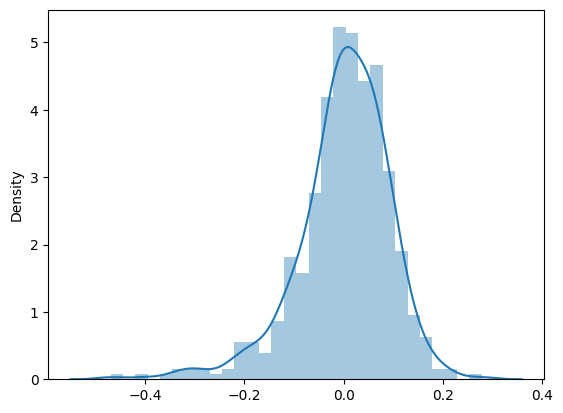

In [1381]:
sns.distplot(residuals)
plt.show()

In [1382]:
residuals.mean()

-3.427019790016509e-16

##### Observation: The error terms are normally distributed with mean=0

##### 2.Check the HOMOSCEDASTICTY of the model

<function matplotlib.pyplot.show(close=None, block=None)>

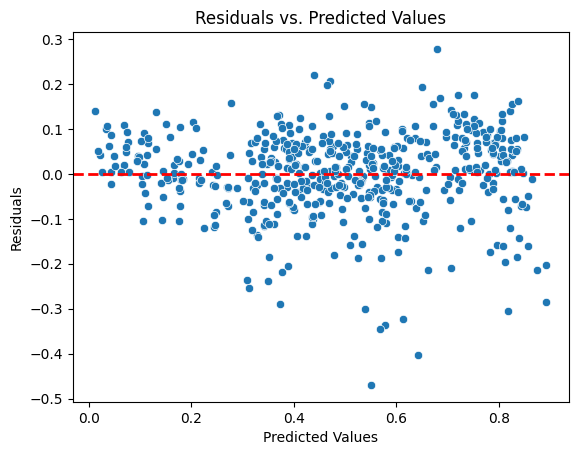

In [1383]:
sns.scatterplot(x=y_train_predict, y=residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show

##### Observation:the residuals are randomly dispersed around the horizontal line (y=0) with no apparent pattern, 
##### which indicates homoscedasticity(variance of residuals is constant)

#### 3.Check for Independence(no autocorrelation in the residuals) using Durbin-Watson Test

In [1384]:
dw = sm.stats.durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw}')

Durbin-Watson statistic: 1.9842804280386481


##### Observation:A value close to 2 suggests no autocorrelation, while values significantly different 
##### from 2 suggest positive or negative autocorrelation. Since the value is close to 2,residuals are not autocorrelated


#### 4.Check for multicollinearity-Variation INflation Factor(VIF)

In [1385]:
vif

Features    VIF
0                        const  42.96
1                         temp   3.32
4                season_spring   2.74
5                season_winter   2.41
2                          hum   2.17
11           weathersit_cloudy   1.76
8                     mnth_oct   1.46
7                     mnth_jul   1.35
12  weathersit_light snow/rain   1.31
3                    windspeed   1.18
9                     mnth_sep   1.13
6                      yr_2019   1.07
10                 weekday_sun   1.01

##### Observation:Since the VIF values of all the variables are <5, the predictor variables are not auto-correlated

##### so, all the model assumptions holds good and so the model is a good fit

#### STEP7:MAking Predictions using the final model

##### Applying scaling on test sets

In [1386]:
bike.head()

temp      hum  windspeed   cnt  season_spring  season_summer  \
0  14.110847  80.5833  10.749882   985              1              0   
1  14.902598  69.6087  16.652113   801              1              0   
2   8.050924  43.7273  16.636703  1349              1              0   
3   8.200000  59.0435  10.739832  1562              1              0   
4   9.305237  43.6957  12.522300  1600              1              0   

   season_winter  yr_2019  mnth_aug  mnth_dec  ...  holiday_yes  \
0              0        0         0         0  ...            0   
1              0        0         0         0  ...            0   
2              0        0         0         0  ...            0   
3              0        0         0         0  ...            0   
4              0        0         0         0  ...            0   

   workingday_yes  weekday_mon  weekday_sat  weekday_sun  weekday_thu  \
0               1            1            0            0            0   
1               1            0            0            0            0   
2               1            0            0            0            0   
3               1            0            0            0            1   
4               1            0            0            0            0   

   weekday_tue  weekday_wed  weathersit_cloudy  weathersit_light snow/rain  
0            0            0                  1                           0  
1            1            0                  1                           0  
2            0            1                  0                           0  
3            0            0                  0                           0  
4            0            0                  0                           0  

[5 rows x 29 columns]

In [1387]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

In [1388]:
btest[num_vars]=scaler.fit_transform(btest[num_vars])

##### Dividing into xtest and ytest

In [1389]:
y_test=btest.pop('cnt')

In [1390]:
X_test=btest

##### Now taking only the variables that our model chose

In [1391]:
X_test_new=X_test[selected_features]

##### Adding a constant variable

In [1392]:
X_test_new=sm.add_constant(X_test_new)

##### Predicting the y_test values using our model

In [1393]:
y_test_pred=fin_model.predict(X_test_new)

#### STEP8:MODEL EVALUATION

##### Lets plot the scatter plot of y_test and y_predicted

<function matplotlib.pyplot.show(close=None, block=None)>

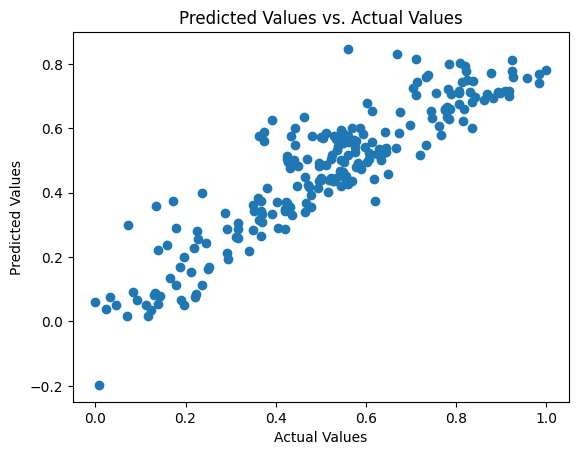

In [1394]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs. Actual Values')
plt.show

##### Observation:Predicted vs Actual value plots shows that the model is reasonably accurate.

##### Checking R-squared values for train data and test data

In [1395]:
from sklearn.metrics import r2_score


In [1396]:
r_squared_train=r2_score(y_train, y_train_predict)


In [1411]:
y_train.shape

(507,)

In [1416]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2_train=1-(1-r_squared_train)*(507-1)/(507-12-1)
print(Adj_r2_train)

0.841683484368412


In [1417]:
r_squared_test=r2_score(y_test, y_test_pred)

In [1418]:
y_test.shape

(218,)

In [1419]:
Adj_r2_test=1-(1-r_squared_test)*(218-1)/(218-12-1)
print(Adj_r2_test)

0.7696600378429845


In [1421]:
print("R-Squared value for train data is ",round(r_squared_train,2))

R-Squared value for train data is  0.85


In [1422]:
print("Adj.R-Squared value for train data is ",round(Adj_r2_train,2))

Adj.R-Squared value for train data is  0.84


In [1424]:
print("R-Squared value for test data is ",round(r_squared_test,2))

R-Squared value for test data is  0.78


In [1423]:
print("Adj.R-Squared value for test data is ",round(Adj_r2_test,2))

Adj.R-Squared value for test data is  0.77


##### Results:
##### Good Fit: The model has a good fit on the training data (0.845) and reasonably good performance on the test data (0.782).
##### Generalization: The model generalizes well to new data, as indicated by the relatively small drop in R-squared between training and test sets.

In [1400]:
fin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     225.2
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.80e-191
Time:                        13:27:41   Log-Likelihood:                 485.73
No. Observations:                 507   AIC:                            -945.5
Df Residuals:                     494   BIC:                            -890.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2583      0.027      9.437      0.000       0.205       0.312
temp                           0.4677      0.032     14.424      0.000       0.404       0.531
hum                           -0.1319      0.029     -4.507      0.000      -0.189      -0.074
windspeed                     -0.1255      0.024     -5.316      0.000      -0.172      -0.079
season_spring                 -0.1363      0.016     -8.496      0.000      -0.168      -0.105
season_winter                  0.0308      0.015      2.059      0.040       0.001       0.060
yr_2019                        0.2425      0.009     28.079      0.000       0.226       0.259
mnth_jul                      -0.0636      0.018     -3.540      0.000      -0.099      -0.028
mnth_oct                       0.0668      0.019      3.571      0.000       0.030       0.103
mnth_sep                       0.0794      0.016      4.984      0.000       0.048       0.111
weekday_sun                    0.0295      0.012      2.529      0.012       0.007       0.052
weathersit_cloudy             -0.0482      0.012     -4.170      0.000      -0.071      -0.025
weathersit_light snow/rain    -0.1957      0.033     -5.976      0.000      -0.260      -0.131
==============================================================================
Omnibus:                      105.164   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.087
Skew:                          -1.052   Prob(JB):                     2.46e-56
Kurtosis:                       5.774   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### CONCLUSION:

#### The Equation of our best fitted line is,
#### cnt=0.4677*temp-0.1319*hum-0.1255*windspeed-0.1363*season_spring+0.0308*season_winter+0.2425*yr_2019-0.0636*mnth_jul
#### +0.0668*mnth_oct+0.0794*mnth_sep+0.0295*weekday_sun-0.0482*weathersit_cloudy-0.1957*weathersit_light snow/rain	

##### We did Recursive Elimination method to select the necessary features, and then OLS regression method to create a linear model

##### The resulting model  has pvalues<0.05 and VIF values <5 and R-squared,adj.R-squared as 0.845

##### The model has a good fit on the training data  and reasonably good performance on the test data.
##### R-Squared value for train data is  0.85
##### Adj.R-Squared value for train data is  0.84
##### R-Squared value for test data is  0.78
##### Adj.R-Squared value for test data is  0.77



##### Checked all the linear regression model assumptions-1.Linearity,2.Multivariate Normality,
##### 3.Multicollinearity,4.Homoscedasticity, and 5.No Autocorrelation. The model passed all the assumption tests

12 Features('temp','hum', 'windspeed', 'season_spring',
       'season_winter', 'yr_2019', 'mnth_jul', 
       'mnth_oct', 'mnth_sep', 
       'weekday_sun', 'weathersit_cloudy',
       'weathersit_light snow/rain') have been selected by the model

### Business Goals:


#### 1. Boombikes can focus on the temperature
#### 2.Boombikes can focus on the months-september,Octoberand winter
#### 3.Boombikes can focus more on sundays
#### 4.cloudy days,snow/rain days,humidity,windspeed are negatively correlated to the count of bike rentals